# MD MEHER HASSAN CHOWDHURY
# 1155645


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

import numpy as np # linear algebra
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Assignment2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Assignment2/Ground_Truth/107.png
/content/drive/MyDrive/Assignment2/Ground_Truth/124.png
/content/drive/MyDrive/Assignment2/Ground_Truth/125.png
/content/drive/MyDrive/Assignment2/Ground_Truth/138.png
/content/drive/MyDrive/Assignment2/Ground_Truth/130.png
/content/drive/MyDrive/Assignment2/Ground_Truth/133.png
/content/drive/MyDrive/Assignment2/Ground_Truth/121.png
/content/drive/MyDrive/Assignment2/Ground_Truth/128.png
/content/drive/MyDrive/Assignment2/Ground_Truth/104.png
/content/drive/MyDrive/Assignment2/Ground_Truth/115.png
/content/drive/MyDrive/Assignment2/Ground_Truth/106.png
/content/drive/MyDrive/Assignment2/Ground_Truth/131.png
/content/drive/MyDrive/Assignment2/Ground_Truth/123.png
/content/drive/MyDrive/Assignment2/Ground_Truth/1.png
/content/drive/MyDrive/Assignment2/Ground_Truth/100.png
/content/drive/MyDrive/Assignment2/Ground_Truth/108.png
/content/drive/MyDrive/Assignment2/Ground_Truth/129.png
/content/drive/MyDrive/Assignment2/Ground_Truth/11

In [4]:
import tensorflow as tf
from zipfile import ZipFile 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

In [5]:
print("Train set:  ", len(os.listdir("/content/drive/MyDrive/Assignment2/Training_Images")))#length of folder extracted above in output
print("Train masks:", len(os.listdir("/content/drive/MyDrive/Assignment2/Ground_Truth")))

Train set:   290
Train masks: 290


In [6]:
data_ids = []
paths = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Assignment2/Training_Images'):
    for filename in filenames:#images in train folder
        path = os.path.join(dirname, filename)    
        paths.append(path)#images address
        
        train_id = filename.split(".")[0]
        data_ids.append(train_id) #id of train images

d = {"id": data_ids, "train_path": paths}
df = pd.DataFrame(data = d)
df = df.set_index('id')
df2 = df # df containing path to each training image and image unique name as index
df.head(5)

,train_path
id,
141,/content/drive/MyDrive/Assignment2/Training_Im...
147,/content/drive/MyDrive/Assignment2/Training_Im...
124,/content/drive/MyDrive/Assignment2/Training_Im...
110,/content/drive/MyDrive/Assignment2/Training_Im...
111,/content/drive/MyDrive/Assignment2/Training_Im...


# BAD FILE

In [7]:
##getiing corrupted files
import os
from os import listdir
from PIL import Image
count=0
for filename in os.listdir('/content/drive/MyDrive/Assignment2/Training_Images'):
    if filename.endswith('jpg'):
     try:
      img=Image.open('/content/drive/MyDrive/Assignment2/Training_Images'+filename)
      img.verify()
     except(IOError,SyntaxError)as e:
         print('Bad file  :  '+filename)
         count=count+1
         print(count)
    if filename.endswith('jpg'):
     try:
      img=Image.open('/content/drive/MyDrive/Assignment2/Training_Images'+filename)
      img.verify()
     except(IOError,SyntaxError)as e:
         print('Bad file for Training Images :  '+filename)
         count=count+1
         print(count)

Bad file  :  141.jpg
1
Bad file for Training Images :  141.jpg
2
Bad file  :  147.jpg
3
Bad file for Training Images :  147.jpg
4
Bad file  :  124.jpg
5
Bad file for Training Images :  124.jpg
6
Bad file  :  110.jpg
7
Bad file for Training Images :  110.jpg
8
Bad file  :  111.jpg
9
Bad file for Training Images :  111.jpg
10
Bad file  :  132.jpg
11
Bad file for Training Images :  132.jpg
12
Bad file  :  113.jpg
13
Bad file for Training Images :  113.jpg
14
Bad file  :  136.jpg
15
Bad file for Training Images :  136.jpg
16
Bad file  :  152.jpg
17
Bad file for Training Images :  152.jpg
18
Bad file  :  109.jpg
19
Bad file for Training Images :  109.jpg
20
Bad file  :  125.jpg
21
Bad file for Training Images :  125.jpg
22
Bad file  :  145.jpg
23
Bad file for Training Images :  145.jpg
24
Bad file  :  107.jpg
25
Bad file for Training Images :  107.jpg
26
Bad file  :  103.jpg
27
Bad file for Training Images :  103.jpg
28
Bad file  :  14.jpg
29
Bad file for Training Images :  14.jpg
30
Bad fi

In [11]:
mask_ids = []
mask_path = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Assignment2/Ground_Truth'):
    for filename in filenames: #contents of train_mask folder
        path = os.path.join(dirname, filename)
        mask_path.append(path)  #
        
        mask_id = filename.split(".")[0]
        mask_id = mask_id.split("_mask")[0]
        mask_ids.append(mask_id)

        
d = {"id": mask_ids,"mask_path": mask_path}
mask_df = pd.DataFrame(data = d)
mask_df = mask_df.set_index('id') #containg path to masks of train data and unique id if images as index 
mask_df

,mask_path
id,
107,/content/drive/MyDrive/Assignment2/Ground_Trut...
124,/content/drive/MyDrive/Assignment2/Ground_Trut...
125,/content/drive/MyDrive/Assignment2/Ground_Trut...
138,/content/drive/MyDrive/Assignment2/Ground_Trut...
130,/content/drive/MyDrive/Assignment2/Ground_Trut...
...,...
90,/content/drive/MyDrive/Assignment2/Ground_Trut...
94,/content/drive/MyDrive/Assignment2/Ground_Trut...
87,/content/drive/MyDrive/Assignment2/Ground_Trut...


In [12]:
mask_df["mask_path"][0]

'/content/drive/MyDrive/Assignment2/Ground_Truth/107.png'

In [13]:
##getiing corrupted files
import os
from os import listdir
from PIL import Image
count=0
for filename in os.listdir('/content/drive/MyDrive/Assignment2/Ground_Truth'):
    if filename.endswith('jpg'):
     try:
      img=Image.open('/content/drive/MyDrive/Assignment2/Ground_Truth'+filename)
      img.verify()
     except(IOError,SyntaxError)as e:
         print('Bad file  :  '+filename)
         count=count+1
         print(count)
    if filename.endswith('png'):
     try:
      img=Image.open('/content/drive/MyDrive/Assignment2/Ground_Truth'+filename)
      img.verify()
     except(IOError,SyntaxError)as e:
         print('Bad file for Mask Images :  '+filename)
         count=count+1
         print(count)

Bad file for Mask Images :  107.png
1
Bad file for Mask Images :  124.png
2
Bad file for Mask Images :  125.png
3
Bad file for Mask Images :  138.png
4
Bad file for Mask Images :  130.png
5
Bad file for Mask Images :  133.png
6
Bad file for Mask Images :  121.png
7
Bad file for Mask Images :  128.png
8
Bad file for Mask Images :  104.png
9
Bad file for Mask Images :  115.png
10
Bad file for Mask Images :  106.png
11
Bad file for Mask Images :  131.png
12
Bad file for Mask Images :  123.png
13
Bad file for Mask Images :  1.png
14
Bad file for Mask Images :  100.png
15
Bad file for Mask Images :  108.png
16
Bad file for Mask Images :  129.png
17
Bad file for Mask Images :  118.png
18
Bad file for Mask Images :  114.png
19
Bad file for Mask Images :  101.png
20
Bad file for Mask Images :  140.png
21
Bad file for Mask Images :  111.png
22
Bad file for Mask Images :  109.png
23
Bad file for Mask Images :  134.png
24
Bad file for Mask Images :  122.png
25
Bad file for Mask Images :  113.png


In [14]:
df["mask_path"] = mask_df["mask_path"]#putting image path and mask path in a single dataframe
df

,train_path,mask_path
id,,
141,/content/drive/MyDrive/Assignment2/Training_Im...,/content/drive/MyDrive/Assignment2/Ground_Trut...
147,/content/drive/MyDrive/Assignment2/Training_Im...,/content/drive/MyDrive/Assignment2/Ground_Trut...
124,/content/drive/MyDrive/Assignment2/Training_Im...,/content/drive/MyDrive/Assignment2/Ground_Trut...
110,/content/drive/MyDrive/Assignment2/Training_Im...,/content/drive/MyDrive/Assignment2/Ground_Trut...
111,/content/drive/MyDrive/Assignment2/Training_Im...,/content/drive/MyDrive/Assignment2/Ground_Trut...
...,...,...
93,/content/drive/MyDrive/Assignment2/Training_Im...,/content/drive/MyDrive/Assignment2/Ground_Trut...
96,/content/drive/MyDrive/Assignment2/Training_Im...,/content/drive/MyDrive/Assignment2/Ground_Trut...
91,/content/drive/MyDrive/Assignment2/Training_Im...,/content/drive/MyDrive/Assignment2/Ground_Trut...


## Augmentation

In [15]:
img_size = [64,64]

def data_augmentation(train_img, mask_img):# few data augmentation methods

    if tf.random.uniform(()) > 0.5:#generatin a random condition wih random number between 0 and 1 
        train_img = tf.image.flip_left_right(train_img)
        train_img = tf.image.flip_up_down(train_img)#flipping image from left to right
        train_img = tf.image.random_crop(train_img)
        mask_img = tf.image.flip_left_right(mask_img)#flipping image masks from left to right
        mask_img = tf.image.flip_up_down(mask_img)
        mask_img = tf.image.random_crop(mask_img)

    return train_img, mask_img

def preprocessing(train_path, mask_path):
    train_img = tf.io.read_file(train_path) #reading train image path
    train_img = tf.image.decode_jpeg(train_img, channels=3) #coverting from scalar string tensor to  3d uint8
    train_img = tf.image.resize(train_img, img_size) #resizing it ti use it more conviniently 
    train_img = tf.cast(train_img, tf.float32) / 255.0 # normalizing the pixel values between 0 to 1
    
    mask_img = tf.io.read_file(mask_path)#reading mask path
    mask_img = tf.image.decode_png(mask_img, channels=3)
    mask_img = tf.image.resize(mask_img, img_size)
    mask_img = mask_img[:,:,:1]  #taking use of only one channel  
    mask_img = tf.math.sign(mask_img)
    
    
    return train_img, mask_img
def create_dataset(df, train = False):
    if not train:
        ds = tf.data.Dataset.from_tensor_slices((df["train_path"].values, df["mask_path"].values))#taking path as object
        ds = ds.map(preprocessing, tf.data.AUTOTUNE) #mapping masks to preproessing function
    else:
        ds = tf.data.Dataset.from_tensor_slices((df["train_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE) # mapping images to preprocessing function
        ds = ds.map(data_augmentation, tf.data.AUTOTUNE)# mapping images to data_augmemtation function

    return ds

# Without Augmentation

In [16]:
img_size = [64,64]


def preprocessing(train_path, mask_path):
    train_img = tf.io.read_file(train_path) #reading train image path
    train_img = tf.image.decode_jpeg(train_img, channels=3) #coverting from scalar string tensor to  3d uint8
    train_img = tf.image.resize(train_img, img_size) #resizing it ti use it more conviniently 
    train_img = tf.cast(train_img, tf.float32) / 255.0 # normalizing the pixel values between 0 to 1
    
    mask_img = tf.io.read_file(mask_path)#reading mask path
    mask_img = tf.image.decode_png(mask_img, channels=3)
    mask_img = tf.image.resize(mask_img, img_size)
    mask_img = mask_img[:,:,:1]  #taking use of only one channel  
    mask_img = tf.math.sign(mask_img)
    
    
    return train_img, mask_img
def create_dataset(df2, train = False):
    if not train:
        ds = tf.data.Dataset.from_tensor_slices((df["train_path"].values, df["mask_path"].values))#taking path as object
        ds = ds.map(preprocessing, tf.data.AUTOTUNE) #mapping masks to preproessing function
    else:
        ds = tf.data.Dataset.from_tensor_slices((df["train_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE) # mapping images to preprocessing function
        #ds = ds.map(data_augmentation, tf.data.AUTOTUNE)# mapping images to data_augmemtation function

    return ds

In [17]:
df2.columns

Index(['train_path', 'mask_path'], dtype='object')

In [18]:
df.columns

Index(['train_path', 'mask_path'], dtype='object')

In [19]:
sh = plt.imread(df["mask_path"][0]).shape # real shape of mask 
mask_h = sh[0]#real height of mask images
mask_w = sh[1]#real width of mask images

In [20]:
mask_h

577

In [21]:
import tensorflow as tf
try:
    AUTOTUNE = tf.data.AUTOTUNE     
except:
    AUTOTUNE = tf.data.experimental.AUTOTUNE

In [22]:
train_df, valid_df = train_test_split(df, random_state=42, test_size=.25)# splitting given labelled data into train and valid 
train = create_dataset(train_df)# train dataset
valid = create_dataset(valid_df)# valid dataset

In [23]:
train_df2, valid_df2 = train_test_split(df2, random_state=42, test_size=.25)# splitting given labelled data into train and valid 
train2 = create_dataset(train_df2)# train dataset
valid2 = create_dataset(valid_df2)# valid dataset

In [24]:
def imshow(img):
    # Convert from tensor image
    plt.imshow(np.transpose(img, (1,2,0)))

In [25]:
TRAIN_LENGTH = len(train_df)#length if train dataset
BATCH_SIZE = 16 # batch size to train images 
BUFFER_SIZE = 1000 #

In [26]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat() # shuffing and batching records
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE) #fetching data to train
valid_dataset = valid.batch(BATCH_SIZE)

In [27]:
TRAIN_LENGTH2 = len(train_df2)#length if train dataset
BATCH_SIZE = 16 # batch size to train images 
BUFFER_SIZE = 1000 #

In [28]:
train_dataset2 = train2.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat() # shuffing and batching records
train_dataset2 = train_dataset2.prefetch(buffer_size=tf.data.AUTOTUNE) #fetching data to train
valid_dataset2 = valid2.batch(BATCH_SIZE)

In [29]:
def display(display_list): # function for visualizing  images
    plt.figure(figsize=(10, 10)) #size of plot

    title = ['Input Image', 'True Mask', 'Predicted Mask'] #possible images

    for i in range(len(display_list)): 
        plt.subplot(5, len(display_list), i+1) #image, true_mask, predicted_mask
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i])) #function to show images
        plt.axis('off')
    plt.show()

(64, 64, 3)


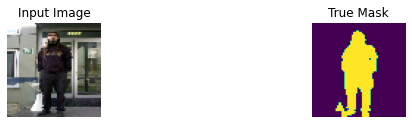

(64, 64, 3)


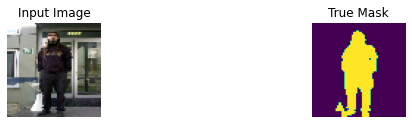

(64, 64, 3)


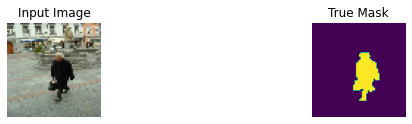

(64, 64, 3)


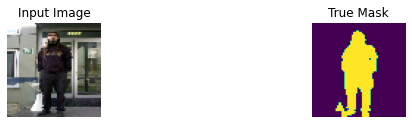

(64, 64, 3)


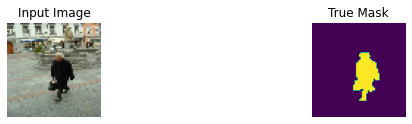

(64, 64, 3)


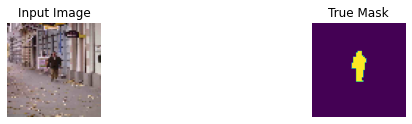

In [30]:
for i in range(4):
   for image, mask in train.take(i): #taking i records
        sample_image, sample_mask = image, mask
        print(sample_image.shape)
        display([sample_image, sample_mask]) #visualizing using above function
        #ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])

In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras.losses import binary_crossentropy
from sklearn.model_selection import train_test_split

# Model Init

In [32]:
def EncoderMiniBlock(inputs, n_filters=32, dropout_prob=0.3, max_pooling=True):
    """
    This block uses multiple convolution layers, max pool, relu activation to create an architecture for learning. 
    Dropout can be added for regularization to prevent overfitting. 
    The block returns the activation values for next layer along with a skip connection which will be used in the decoder
    """
    #  2 Conv Layers with relu activation and HeNormal initialization using TensorFlow 
    # Proper initialization prevents from the problem of exploding and vanishing gradients 
    # 'Same' padding will pad the input to conv layer such that the output has the same height and width (hence, is not reduced in size) 
    conv = Conv2D(n_filters, 
                  3,   # Kernel size   
                  activation='relu',
                  padding='same',
                  kernel_initializer='HeNormal')(inputs)
    conv = Conv2D(n_filters, 
                  3,   # Kernel size
                  activation='relu',
                  padding='same',
                  kernel_initializer='HeNormal')(conv)
    
    # Batch Normalization will normalize the output of the last layer based on the batch's mean and standard deviation
    conv = BatchNormalization()(conv, training=False)

    # In case of overfitting, dropout will regularize the loss and gradient computation to shrink the influence of weights on output
    if dropout_prob > 0:     
        conv = tf.keras.layers.Dropout(dropout_prob)(conv)

    # Pooling reduces the size of the image while keeping the number of channels same
    # Pooling has been kept as optional as the last encoder layer does not use pooling (hence, makes the encoder block flexible to use)
    # Below, Max pooling considers the maximum of the input slice for output computation and uses stride of 2 to traverse across input image
    if max_pooling:
        next_layer = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv)    
    else:
        next_layer = conv

    # skip connection (without max pooling) will be input to the decoder layer to prevent information loss during transpose convolutions      
    skip_connection = conv
    
    return next_layer, skip_connection

In [33]:
def DecoderMiniBlock(prev_layer_input, skip_layer_input, n_filters=32):
    """
    Decoder Block first uses transpose convolution to upscale the image to a bigger size and then,
    merges the result with skip layer results from encoder block
    Adding 2 convolutions with 'same' padding helps further increase the depth of the network for better predictions
    The function returns the decoded layer output
    """
    # transpose convolution layer to first increase the size of the image
    up = Conv2DTranspose(
                 n_filters,
                 (3,3),    # Kernel size
                 strides=(2,2),
                 padding='same')(prev_layer_input)

    # Merge the skip connection from previous block to prevent information loss
    merge = concatenate([up, skip_layer_input], axis=3)
    
    # 2 Conv Layers with relu activation and HeNormal initialization for further processing
    # The parameters for the function are similar to encoder
    conv = Conv2D(n_filters, 
                 3,     # Kernel size
                 activation='relu',
                 padding='same',
                 kernel_initializer='HeNormal')(merge)
    conv = Conv2D(n_filters,
                 3,   # Kernel size
                 activation='relu',
                 padding='same',
                 kernel_initializer='HeNormal')(conv)
    return conv

In [34]:
# Compile U-Net Blocks
def UNetCompiled(input_size=(128, 128, 3), n_filters=16, n_classes=1):
    inputs = Input(input_size)
    
    # Encoder includes multiple convolutional mini blocks with different maxpooling, dropout and filter parameters
    # filters are increasing as we go deeper into the network which will increasse the # channels of the image 
    cblock1 = EncoderMiniBlock(inputs, n_filters,dropout_prob=0, max_pooling=True)
    cblock2 = EncoderMiniBlock(cblock1[0],n_filters*2,dropout_prob=0, max_pooling=True)
    cblock3 = EncoderMiniBlock(cblock2[0], n_filters*4,dropout_prob=0, max_pooling=True)
    cblock4 = EncoderMiniBlock(cblock3[0], n_filters*8,dropout_prob=0.3, max_pooling=True)
    cblock5 = EncoderMiniBlock(cblock4[0], n_filters*16, dropout_prob=0.3, max_pooling=False) 
    
    # Decoder includes multiple mini blocks with decreasing number of filters
    # Observe the skip connections from the encoder are given as input to the decoder
    # Recall the 2nd output of encoder block was skip connection, hence cblockn[1] is used
    ublock6 = DecoderMiniBlock(cblock5[0], cblock4[1],  n_filters * 8)
    ublock7 = DecoderMiniBlock(ublock6, cblock3[1],  n_filters * 4)
    ublock8 = DecoderMiniBlock(ublock7, cblock2[1],  n_filters * 2)
    ublock9 = DecoderMiniBlock(ublock8, cblock1[1],  n_filters)
 
    #  1 3x3 convolution layer (Same as the prev Conv Layers)
    # Followed by a 1x1 Conv layer to get the image to the desired size. 
    # Observe the number of channels will be equal to number of output classes
    conv9 = Conv2D(n_filters,
                 3,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(ublock9)

    conv10 = Conv2D(n_classes, 1, padding='same')(conv9)
    
    # Defining the model
    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model

In [35]:
#compiling unet model
unet = UNetCompiled(input_size=(64,64,3), n_filters=16, n_classes=1)

In [36]:
from keras.losses import binary_crossentropy
import keras.backend as K

#metric and loss function to be used for training model
def dice_coeff(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score


def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss


def bce_dice_loss(y_true, y_pred):
    loss = binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss

In [37]:
unet.compile(optimizer=tf.keras.optimizers.Adam(), 
             loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [38]:
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [39]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [40]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('modelBest', verbose=1, save_best_only=True, save_weights_only=True)
]

In [41]:
hist = unet.fit(train_dataset2, batch_size=16, epochs=100,steps_per_epoch=STEPS_PER_EPOCH, validation_data=valid_dataset)

Epoch 1/100
13/13 [==============================] - 12s 254ms/step - loss: 2.4945 - accuracy: 0.6941 - val_loss: 0.6656 - val_accuracy: 0.7095
Epoch 2/100
13/13 [==============================] - 4s 294ms/step - loss: 0.6474 - accuracy: 0.6797 - val_loss: 0.5995 - val_accuracy: 0.7027
Epoch 3/100
13/13 [==============================] - 2s 189ms/step - loss: 0.5836 - accuracy: 0.7008 - val_loss: 0.5549 - val_accuracy: 0.7140
Epoch 4/100
13/13 [==============================] - 2s 188ms/step - loss: 0.5227 - accuracy: 0.7372 - val_loss: 0.4927 - val_accuracy: 0.7640
Epoch 5/100
13/13 [==============================] - 2s 186ms/step - loss: 0.4721 - accuracy: 0.7848 - val_loss: 0.4598 - val_accuracy: 0.7981
Epoch 6/100
13/13 [==============================] - 2s 183ms/step - loss: 0.5045 - accuracy: 0.7573 - val_loss: 0.4761 - val_accuracy: 0.7565
Epoch 7/100
13/13 [==============================] - 3s 265ms/step - loss: 0.4717 - accuracy: 0.7617 - val_loss: 0.5009 - val_accuracy: 0.718

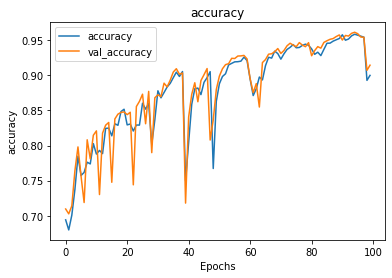

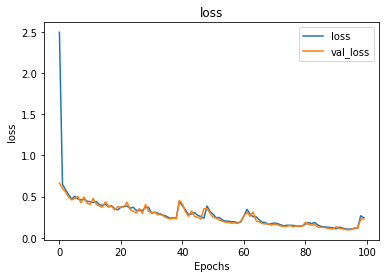

In [42]:
##plotting accuracy and loss
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.title(string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(hist, "accuracy")
plot_graphs(hist, "loss")

# Without Early STopping

In [43]:
hist = unet.fit(train_dataset, batch_size=16, epochs=100,steps_per_epoch=STEPS_PER_EPOCH, validation_data=valid_dataset)

Epoch 1/100
13/13 [==============================] - 4s 189ms/step - loss: 0.2008 - accuracy: 0.9208 - val_loss: 0.1590 - val_accuracy: 0.9364
Epoch 2/100
13/13 [==============================] - 3s 263ms/step - loss: 0.1837 - accuracy: 0.9300 - val_loss: 0.1650 - val_accuracy: 0.9387
Epoch 3/100
13/13 [==============================] - 3s 263ms/step - loss: 0.1578 - accuracy: 0.9390 - val_loss: 0.1442 - val_accuracy: 0.9423
Epoch 4/100
13/13 [==============================] - 3s 265ms/step - loss: 0.1466 - accuracy: 0.9423 - val_loss: 0.1351 - val_accuracy: 0.9483
Epoch 5/100
13/13 [==============================] - 2s 187ms/step - loss: 0.1450 - accuracy: 0.9440 - val_loss: 0.1210 - val_accuracy: 0.9530
Epoch 6/100
13/13 [==============================] - 2s 186ms/step - loss: 0.1247 - accuracy: 0.9529 - val_loss: 0.1286 - val_accuracy: 0.9534
Epoch 7/100
13/13 [==============================] - 2s 188ms/step - loss: 0.1234 - accuracy: 0.9522 - val_loss: 0.1084 - val_accuracy: 0.9569

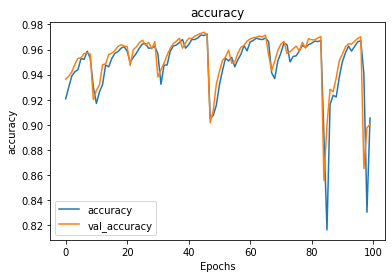

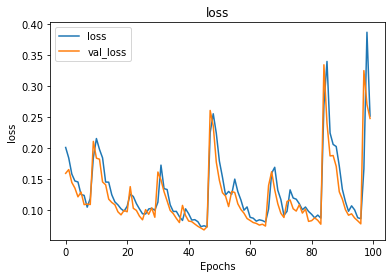

In [44]:
##plotting accuracy and loss
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.title(string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(hist, "accuracy")
plot_graphs(hist, "loss")

# With Early Stopping

In [45]:
hist = unet.fit(train_dataset, batch_size=16, epochs=100,steps_per_epoch=STEPS_PER_EPOCH,callbacks = callbacks, validation_data=valid_dataset)

Epoch 1/100
13/13 [==============================] - ETA: 0s - loss: 0.2280 - accuracy: 0.9137
Epoch 1: val_loss improved from inf to 0.19499, saving model to modelBest
13/13 [==============================] - 3s 212ms/step - loss: 0.2280 - accuracy: 0.9137 - val_loss: 0.1950 - val_accuracy: 0.9240 - lr: 0.0010
Epoch 2/100
13/13 [==============================] - ETA: 0s - loss: 0.1824 - accuracy: 0.9333
Epoch 2: val_loss improved from 0.19499 to 0.15944, saving model to modelBest
13/13 [==============================] - 3s 207ms/step - loss: 0.1824 - accuracy: 0.9333 - val_loss: 0.1594 - val_accuracy: 0.9423 - lr: 0.0010
Epoch 3/100
13/13 [==============================] - ETA: 0s - loss: 0.1716 - accuracy: 0.9370
Epoch 3: val_loss improved from 0.15944 to 0.13119, saving model to modelBest
13/13 [==============================] - 3s 205ms/step - loss: 0.1716 - accuracy: 0.9370 - val_loss: 0.1312 - val_accuracy: 0.9511 - lr: 0.0010
Epoch 4/100
13/13 [==============================] - 

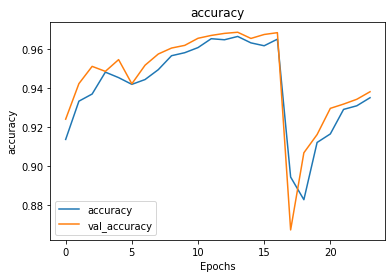

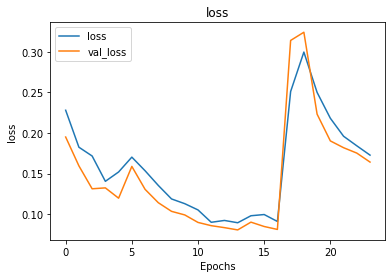

In [46]:
##plotting accuracy and loss
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.title(string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(hist, "accuracy")
plot_graphs(hist, "loss")

In [47]:
#loading the weight of model which last performed  best
unet.load_weights("./modelBest")

In [48]:
from torchvision import transforms

In [49]:
def vis_compare(dataset=valid_dataset,num_case=1):
       
    for sample in dataset.take(1):
        image, label = sample[0].numpy(), sample[1].numpy()
        print(image.shape)
        print(label.shape)
    preds=unet.predict(image)#predicting mask of valid dataset
    #preds = np.squeeze(preds, axis =-1)
    print(preds.shape)
    if num_case>1:
        cases=[j for j in np.random.choice(image.shape[0],size=num_case,replace=False)]   #choosing random images
        for i in cases:
            truth=(image[i],label[i])
            pred=(image[i],preds[i])
            print(f"case_number_{i}")
            fig, arr = plt.subplots(1, 3, figsize=(15, 15))
            arr[0].imshow(image[i])
            arr[0].set_title('Processed Image')
            arr[1].imshow(label[i])
            arr[1].set_title('Actual Masked Image ')
            arr[2].imshow(preds[i])
            arr[2].set_title('Predicted Masked Image ')
    else:
        truth=(image[0],label[0])
        pred=(image[0],preds[0])
        display([image[0],label[0],preds[0]])
            
    
    
    plt.show()

# Prediction

(16, 64, 64, 3)
(16, 64, 64, 1)
(16, 64, 64, 1)


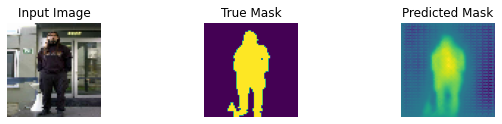

In [50]:
vis_compare(dataset=valid_dataset,num_case=1)

# Table

In [51]:
pip install tabulate

In [52]:

# import module
from tabulate import tabulate
 
# assign data
mydata = [
    ["Without Augmentation", "90","24"],
    ["With Augmentation Without Early Stopping", "90","25"],
    ["With Augmentation With Early Stopping", "93","17"]
]
 
# create header
head = ["Model", "Accuracy","Loss"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+------------------------------------------+------------+--------+
| Model                                    |   Accuracy |   Loss |
+==========================================+============+========+
| Without Augmentation                     |         90 |     24 |
+------------------------------------------+------------+--------+
| With Augmentation Without Early Stopping |         90 |     25 |
+------------------------------------------+------------+--------+
| With Augmentation With Early Stopping    |         93 |     17 |
+------------------------------------------+------------+--------+
